# Problem Description 

The following notebook describes Data Analysis and Feature SElection using PCA for Vehicle Silhouette data set. 

SVM was used for creating the model and parameters tuned using GridSearch.



# Vehicle silhouette Image Data Analysis 

The data set is used below to create a model that is able to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. 

The vehicle may be viewed from one of many different angles.

In [2]:
## Import the necessary Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#  Read the data set and load it into a data frame
df = pd.read_csv("vehicle.csv")

In [4]:
df.head(5) ## view records of the data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


In [6]:
# get the generic information of the data, shape of the data number 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [10]:
## get the generic information of the data
## shape of the dataframe, null values existence,

print("Shape of Data (Rows,Columns)", df.shape)

Shape of Data (Rows,Columns) (846, 19)


In [9]:
print ("Are there null values in the data:",df.isnull().values.any())

Are there null values in the data: True


In [12]:
print("Categorical and Non Categorical Columns")
cat_col = []
non_cat_col = []
for col in df.columns:
    if df[col].dtype.name == 'object':
        cat_col.append(col)
    else:
        non_cat_col.append(col)
print("Columns with Categorical Data", cat_col)
print("Columns with Non Categorical Data", non_cat_col)

Categorical and Non Categorical Columns
Columns with Categorical Data ['class']
Columns with Non Categorical Data ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']


In [13]:
### are there duplicate records
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows based on all columns are :",duplicateRowsDF)

Duplicate Rows based on all columns are : Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


In [14]:
##null values distribution across columns within the data set
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

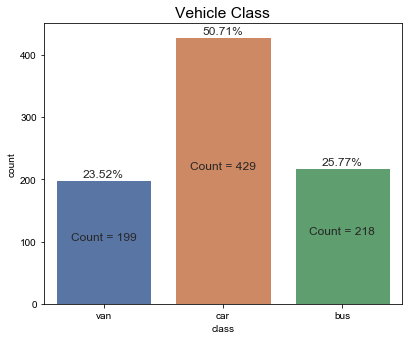

In [15]:
## print the distribution of Class Column in the data: (Check Balance)
plt.subplots(figsize = (6,5))
sns.set(font_scale=1.3)
ax = sns.countplot(x = "class", data=df)
ax.set_title("Vehicle Class")
total = len(df) # for calculation of percentage

for p in ax.patches:
    #get Height of the column
    height = p.get_height()
    X = p.get_x() + p.get_width()/2
    Y = height + 4
    ax.text(X, Y, '{:1.2f}%'.format((height/total)*100), ha="center", size=12)
    ax.text(X, Y/2, f'Count = {height}', ha="center", size=12)
    plt.tight_layout()
## SEmicolon suppresses all the matplotlib text outputs. 
plt.show();

# Findings of Initial Data Analyis

There are 846 rows present in the data set with 19 Columns for each row.

18 Columns have non categorical datatype. (int64 and float64)

The columns "class" has categorical data having 3 different values of van,car and bus.

The graph shows the distribution of the data across the three classes. Class type car takes up 50% of the data within the 
Vehicle Data Set. While van and bus have near about similar counts within the data set.

Null Values are present within the data set. Columns radius_ratio and skewness_about have the highest number of null values

# Statastical Observations

In [16]:
stats_df = df.describe().round(2).T
stats_df["MeanToMedianRatio"] = (stats_df["mean"]/stats_df["50%"]).round(2)
stats_df

,count,mean,std,min,25%,50%,75%,max,MeanToMedianRatio
compactness,846.0,93.68,8.23,73.0,87.00,93.0,100.0,119.0,1.01
circularity,841.0,44.83,6.15,33.0,40.00,44.0,49.0,59.0,1.02
distance_circularity,842.0,82.11,15.78,40.0,70.00,80.0,98.0,112.0,1.03
radius_ratio,840.0,168.89,33.52,104.0,141.00,167.0,195.0,333.0,1.01
pr.axis_aspect_ratio,844.0,61.68,7.89,47.0,57.00,61.0,65.0,138.0,1.01
max.length_aspect_ratio,846.0,8.57,4.60,2.0,7.00,8.0,10.0,55.0,1.07
scatter_ratio,845.0,168.90,33.21,112.0,147.00,157.0,198.0,265.0,1.08
elongatedness,845.0,40.93,7.82,26.0,33.00,43.0,46.0,61.0,0.95
pr.axis_rectangularity,843.0,20.58,2.59,17.0,19.00,20.0,23.0,29.0,1.03
max.length_rectangularity,846.0,148.00,14.52,118.0,137.00,146.0,159.0,188.0,1.01


C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


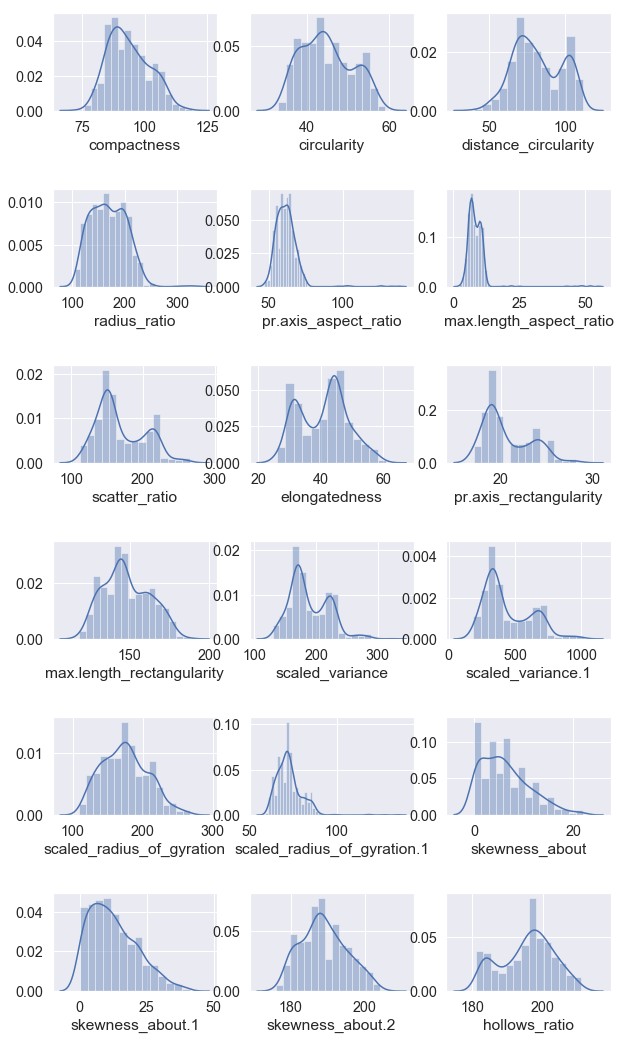

In [17]:
## The function prints multiple dsitribution plots. The rows and columns indicicate the matrix of the 
## diagrams
def multipleDistPlot (no_of_rows,no_of_cols,data_df):
    ## set the subplots count
    figsize_x = 30/no_of_cols
    figsize_y = 18
    fig, axes = plt.subplots(ncols=no_of_cols, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(data_df.columns,axes.flat):
        #print ("Cols:", cols,"Axes:", ax)
        sns.distplot(data_df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)
        
## Visualize the data distributions

## copy the original data frame to a new data frame
visual_df = df.copy()
#visual_df.head(2)

## since the distplot requires not null values for plotting, we will adopt the strategy of replacing
## the null values with the corresponding median

#visual_df = visual_df.fillna(visual_df.median())

for cols in visual_df.columns:
    if (visual_df[cols].dtypes == np.float64):
        visual_df[cols] = visual_df[cols].fillna(visual_df[cols].median())
        visual_df[cols] = visual_df[cols].astype('int64') ## change the float64 to int64 required for distplot
    if (visual_df[cols].dtypes == np.int64):
        visual_df[cols] = visual_df[cols].fillna(visual_df[cols].median())
#visual_df.isna().sum()

## drop the categorical column
visual_df.drop("class", axis=1, inplace=True)
multipleDistPlot (6,3,visual_df)

# Statistical Inference

Columns have data distributed across multiple scales.

Several Column data have distributions that are not unimodal (e.g. distance_circularity,scatter_ratio,elongatedness

Column skweness_about, skewness_about.1 have data that is left skewed whereas skewness_about.2 data is nearly normally distributed.

Some columns have long right tail (e.g. pr.axis_aspect_ratio) evident from the distplot and chances are that they will have outliers

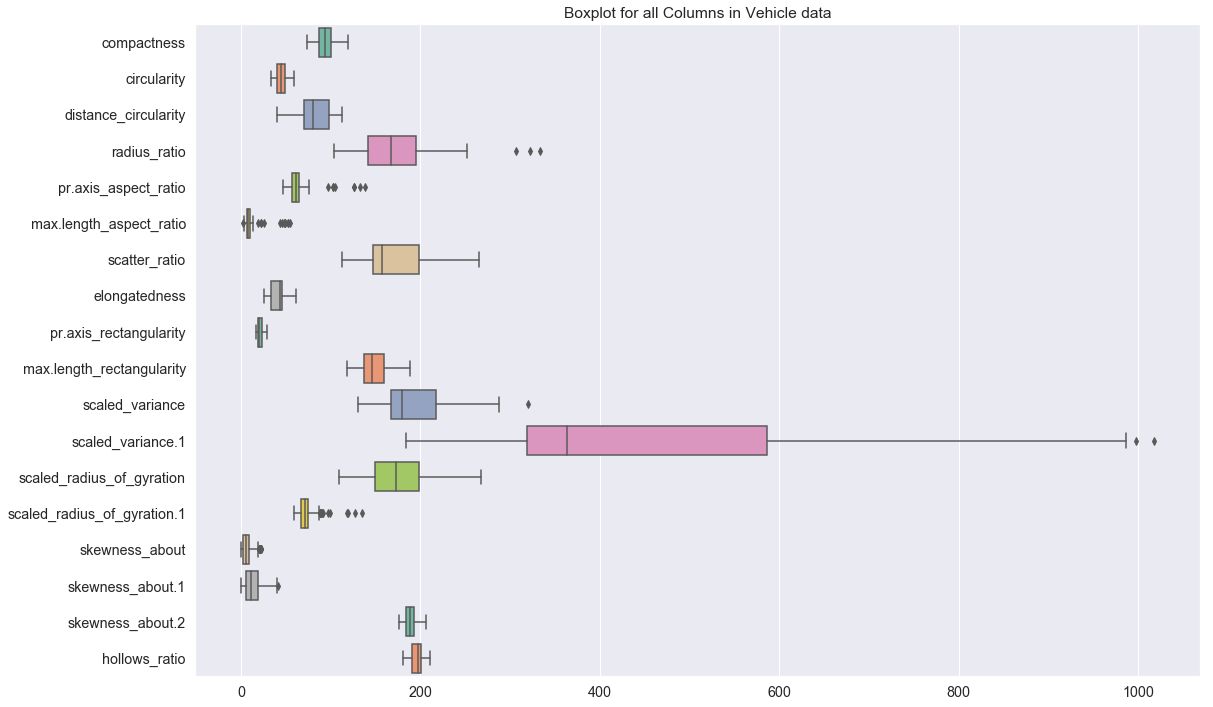

In [18]:
## boxplot for outliers detection
figsize_x = 18
figsize_y = 12
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=visual_df, orient="h", palette="Set2", ax =ax)
ax.set_title("Boxplot for all Columns in Vehicle data")
plt.show();

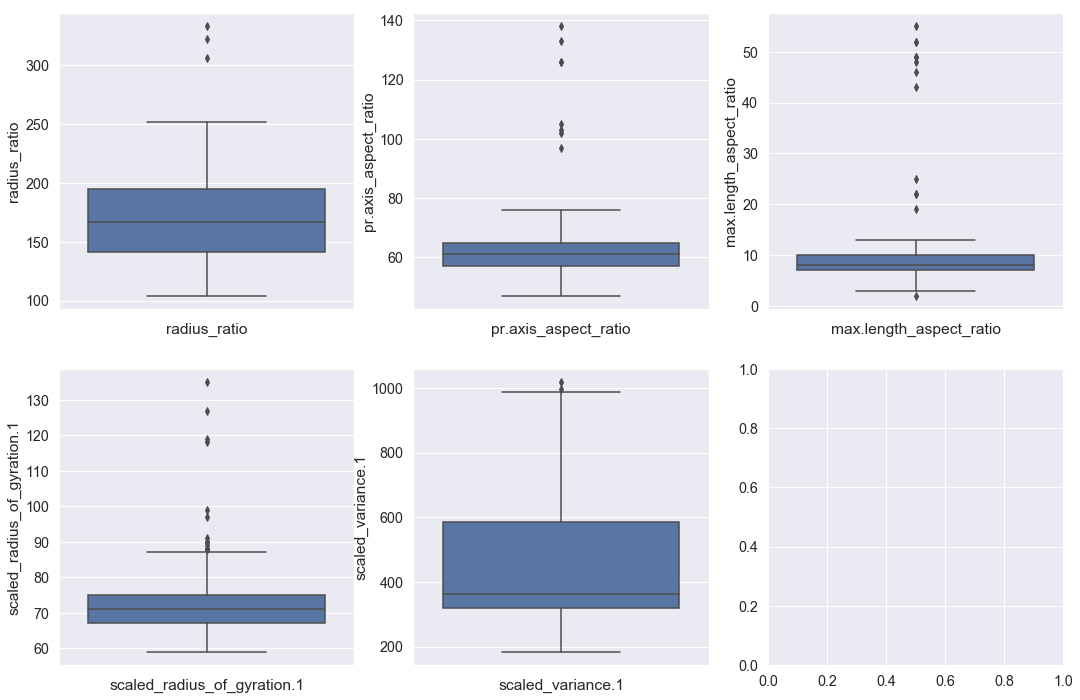

4

8

12

15

9

In [19]:
## Certain columns have more number of outliers. 
## visualize them further
import math
def showdetailedOutliers (column_name,visual_df):
    no_cols = 3
    no_of_rows = math.ceil(len(column_name)/no_cols)
    figsize_x = 18
    figsize_y = 12
    fig, axes = plt.subplots(ncols=3, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(column_name,axes.flat):
        #print ("Cols:", cols,"Axes:", ax)
        sns.boxplot(y=cols, data=visual_df, ax=ax)
        #sns.distplot(data_df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)
    plt.show();

column_name = ["radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio",
               "scaled_radius_of_gyration.1","scaled_variance.1"]
showdetailedOutliers(column_name,visual_df)

visual_df["radius_ratio"][visual_df["radius_ratio"] > 250].count()
visual_df["pr.axis_aspect_ratio"][visual_df["pr.axis_aspect_ratio"] > 80].count()
visual_df["max.length_aspect_ratio"][visual_df["max.length_aspect_ratio"] > 18].count()
visual_df["scaled_radius_of_gyration.1"][visual_df["scaled_radius_of_gyration.1"] > 87].count()
visual_df["scaled_variance.1"][visual_df["scaled_variance.1"] > 950].count()

# Outliers

Initial Boxplots indicates there are outliers in 5 different columns.

To get better understanding we plot indivdual column box plots and get the count of outlier values

scaled_radius_of_gyration.1 and scaled_variance.1 have higher number of outliers amongst the total number of outliers present in multiple columns.

could see that around 5% fo the total records are outliers across multiple columns. (Count ~ 48). 

Hence choose to remove the outliers assuming that they will have not any impact due to information loss since the count is low.

In [20]:
## remove the outliers
visual_df = visual_df[visual_df["radius_ratio"] < 250]
visual_df = visual_df[visual_df["pr.axis_aspect_ratio"] < 80]
visual_df = visual_df[visual_df["max.length_aspect_ratio"] < 18]
visual_df = visual_df[visual_df["scaled_radius_of_gyration.1"] <87]
visual_df = visual_df[visual_df["scaled_variance.1"] < 950]

# Multivariate analysis

We will check in the following sections, how each column is corelated to each other using pairplot and correlation map.

The objective is to identify the columns which donot have corelation with others.

For the columns which show corelation between each other, we will apply PCA to reduce the number of features without loosing the important information.

In [21]:
## we will use the original dataframe and not have any null replacement
## or outliers removal since the data will be used to just visualize the data since this is for analysis only.

In [22]:
## corelation Map 
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1,0.69,0.79,0.69,0.09,0.15,0.81,-0.79,0.81,0.68,0.76,0.82,0.59,-0.25,0.24,0.16,0.3,0.37
circularity,0.69,1,0.8,0.63,0.15,0.25,0.86,-0.83,0.86,0.97,0.81,0.85,0.94,0.05,0.14,-0.01,-0.11,0.05
distance_circularity,0.79,0.8,1,0.77,0.16,0.26,0.91,-0.91,0.9,0.78,0.87,0.89,0.71,-0.23,0.11,0.27,0.15,0.33
radius_ratio,0.69,0.63,0.77,1,0.67,0.45,0.74,-0.79,0.71,0.57,0.8,0.73,0.54,-0.18,0.05,0.17,0.38,0.47
pr.axis_aspect_ratio,0.09,0.15,0.16,0.67,1,0.65,0.1,-0.18,0.08,0.13,0.27,0.09,0.12,0.15,-0.06,-0.03,0.24,0.27
max.length_aspect_ratio,0.15,0.25,0.26,0.45,0.65,1,0.17,-0.18,0.16,0.31,0.32,0.14,0.19,0.3,0.02,0.04,-0.03,0.14
scatter_ratio,0.81,0.86,0.91,0.74,0.1,0.17,1,-0.97,0.99,0.81,0.95,1,0.8,-0.03,0.07,0.21,0.01,0.12
elongatedness,-0.79,-0.83,-0.91,-0.79,-0.18,-0.18,-0.97,1,-0.95,-0.78,-0.94,-0.96,-0.77,0.1,-0.05,-0.19,-0.11,-0.22
pr.axis_rectangularity,0.81,0.86,0.9,0.71,0.08,0.16,0.99,-0.95,1,0.81,0.94,0.99,0.8,-0.02,0.08,0.22,-0.02,0.1
max.length_rectangularity,0.68,0.97,0.78,0.57,0.13,0.31,0.81,-0.78,0.81,1,0.75,0.8,0.87,0.04,0.14,0,-0.1,0.08


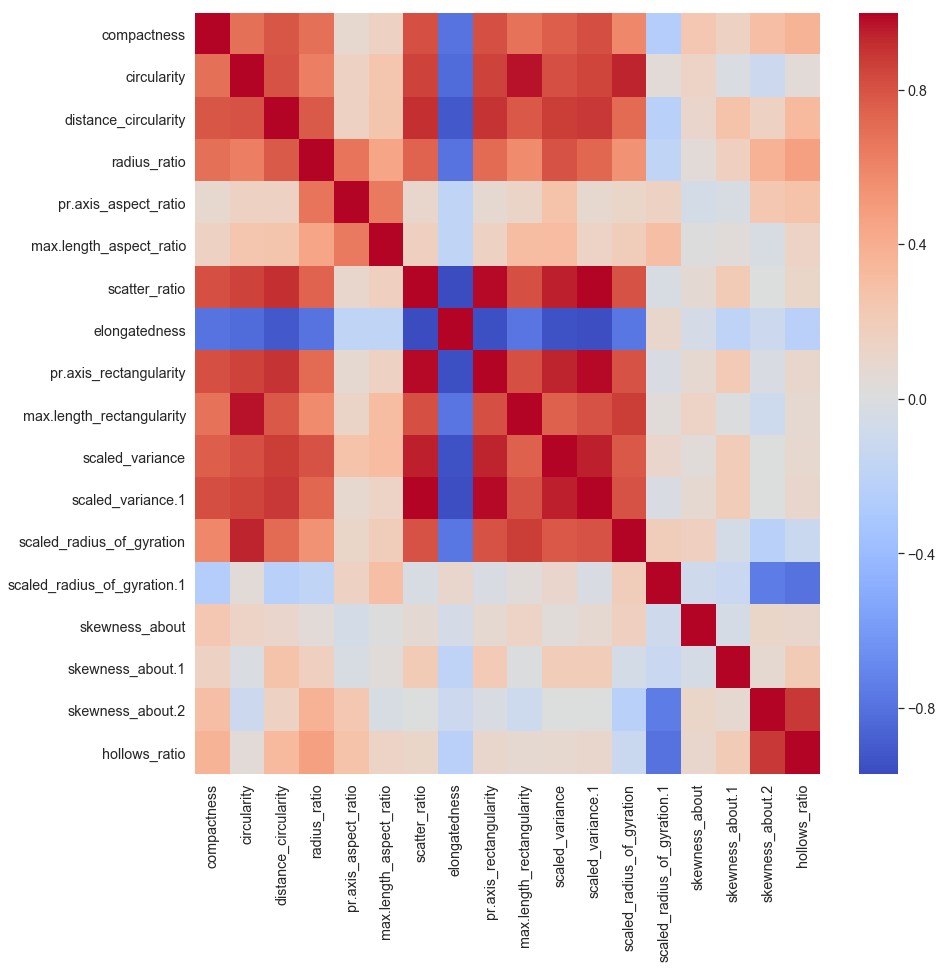

In [23]:
## print the heat map
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='coolwarm',ax =ax)

## split the pairplots into smaller sets for better visualisation
## we choose the columns for visualisation that have higher corelation as per the heat map. we define this as Set High.

df1 = df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']]
## columns which as per the heat map have lower corelations definded as Set Low
df2 = df[['pr.axis_aspect_ratio', 'max.length_aspect_ratio','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class']]
#sns.pairplot(data = df1,hue="class", palette="husl")

# Observations from Heat Map

We notice that the following set of columns have high corelation amongst each other (Potential target for PCA Feature reduction)
['compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']

However we also notice that pr.axis_aspect_ratio and max.length_aspect_ratio donot have corelation with any other columns apart from themselves.

Similarly scaled_radius_of_gyration.1 has high negative corealtion with skewness_about.2 and hollows_ratio columns. it has very less corelation with others.

Similary hollows_ratio has high corelation with skewness_about.2 and scaled_radius_of_gyration.

We will look at each of the combinations to further analyse the corelation patterns.

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


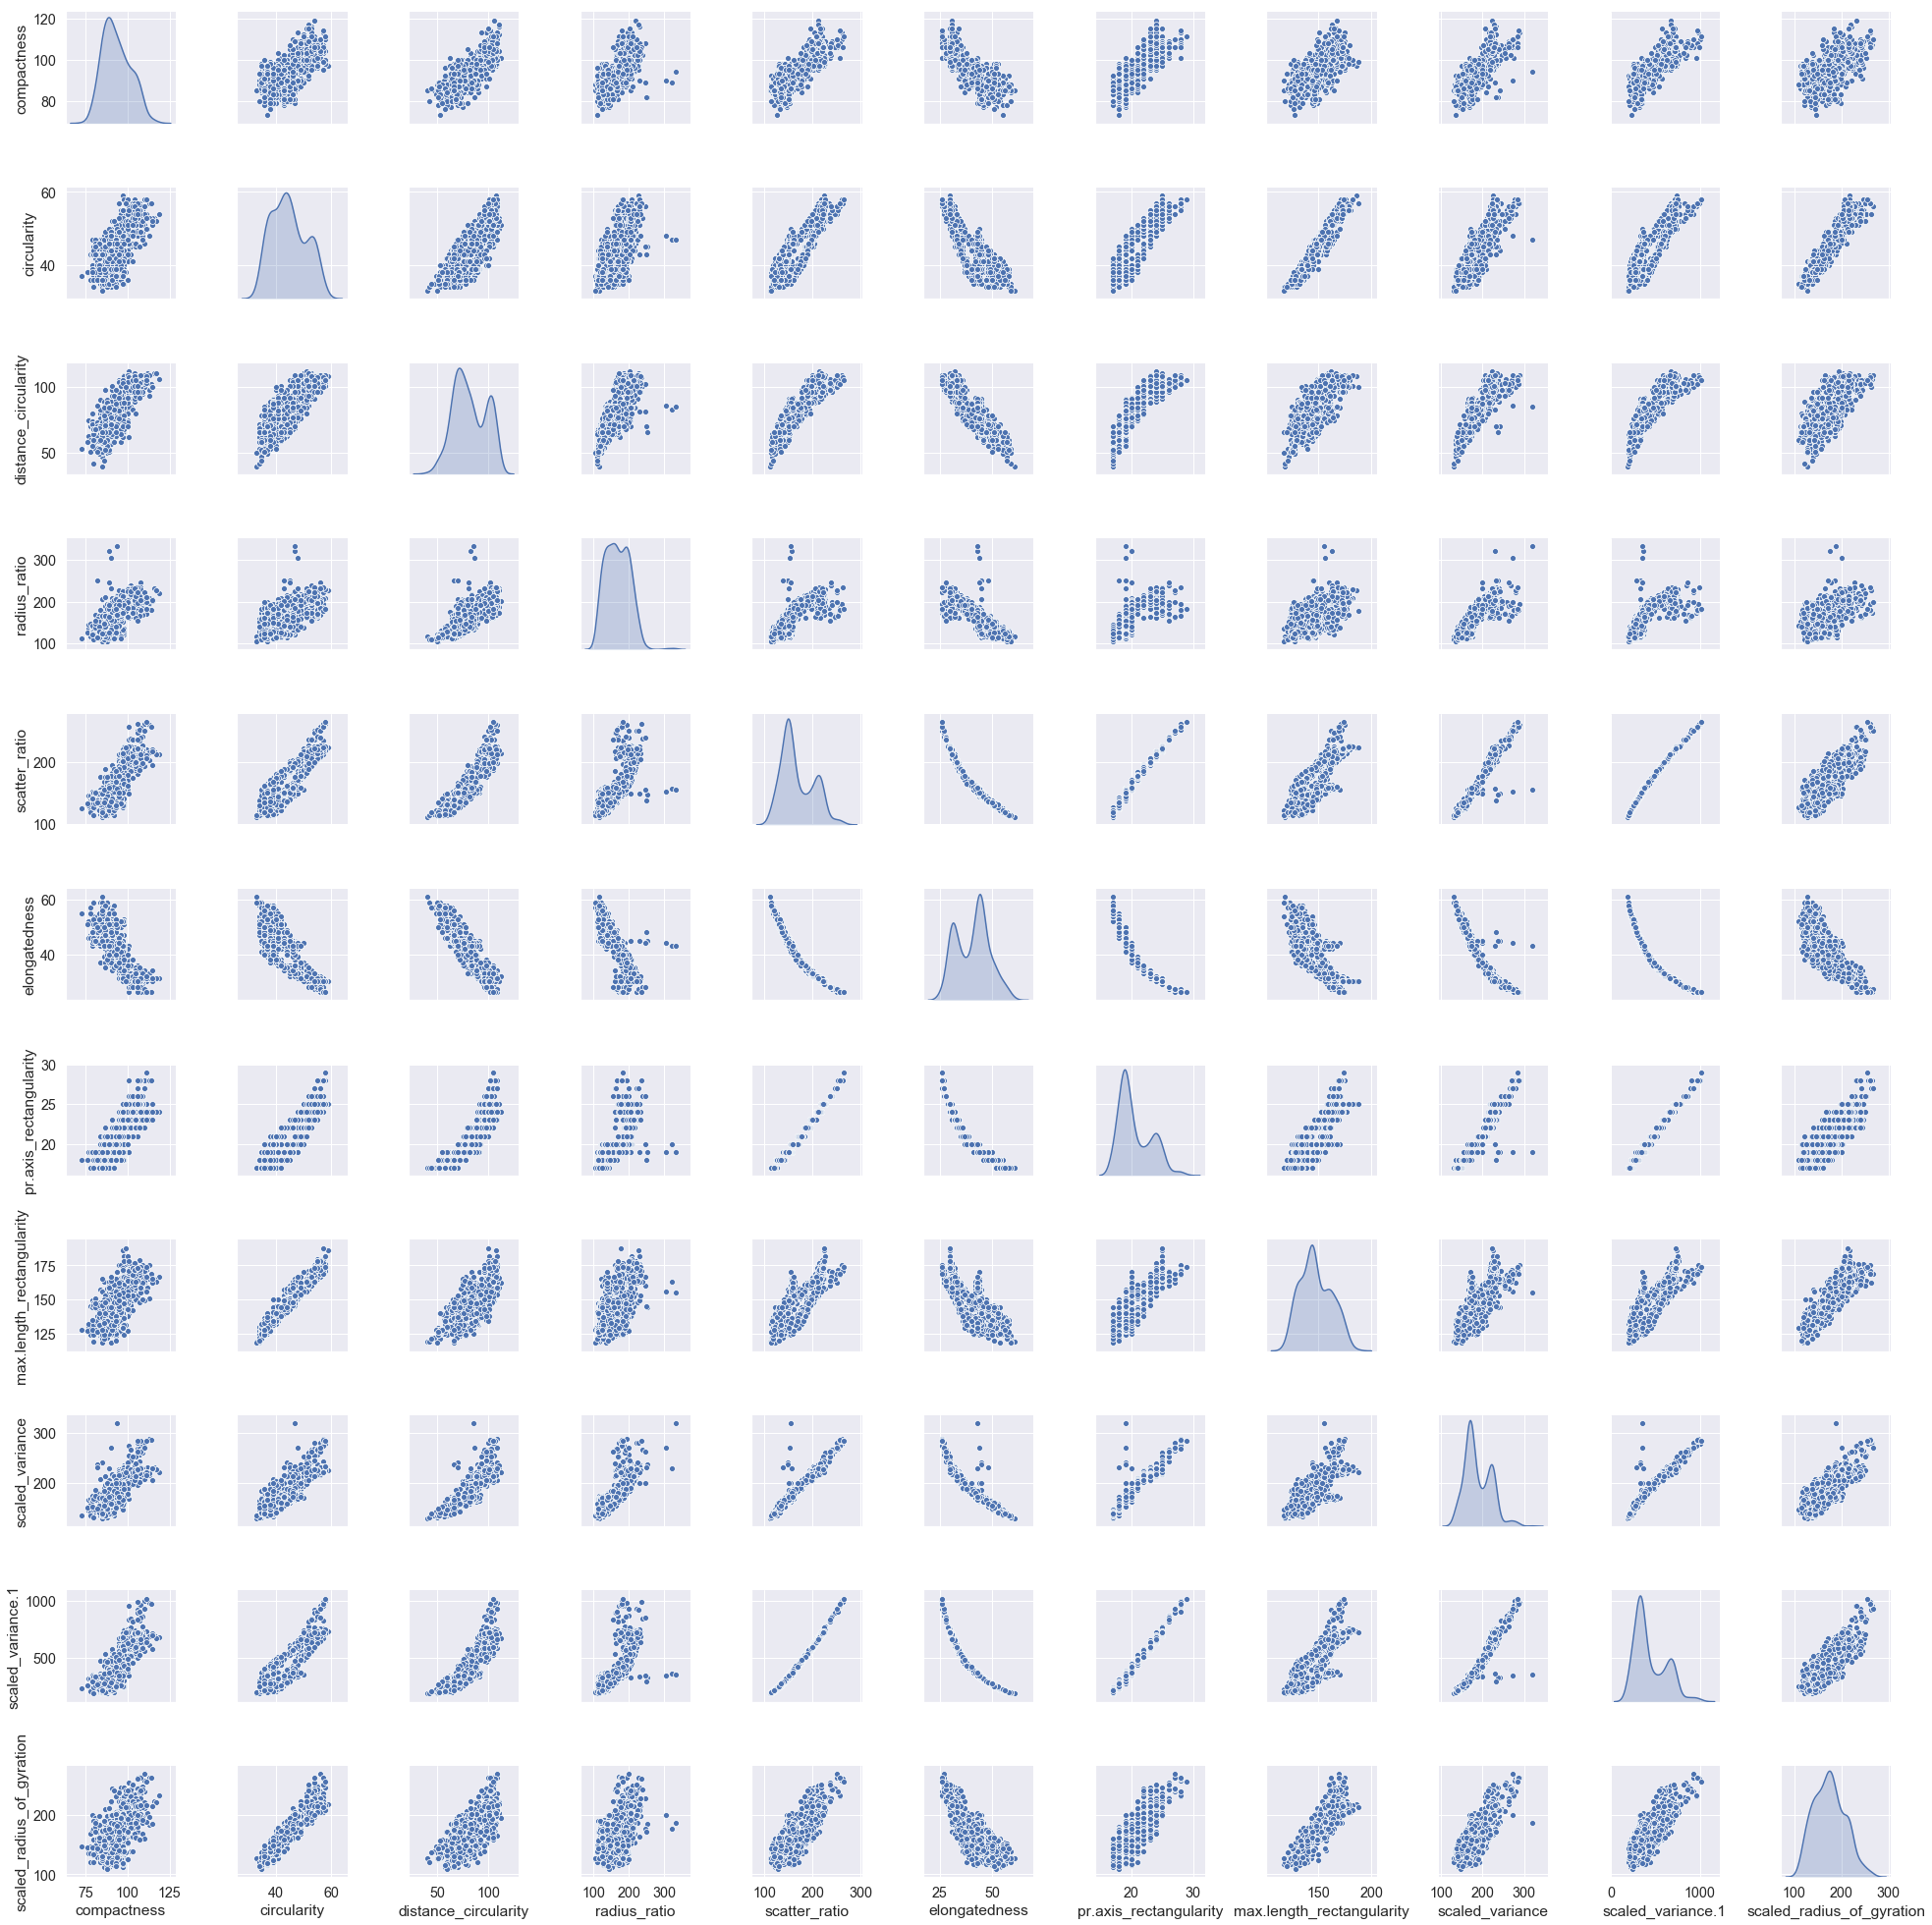

In [24]:
## pair plot for the set of columns that have a higher corelation amongst each other as per the heat map
sns.pairplot(data = df1,palette="husl", diag_kind="kde")

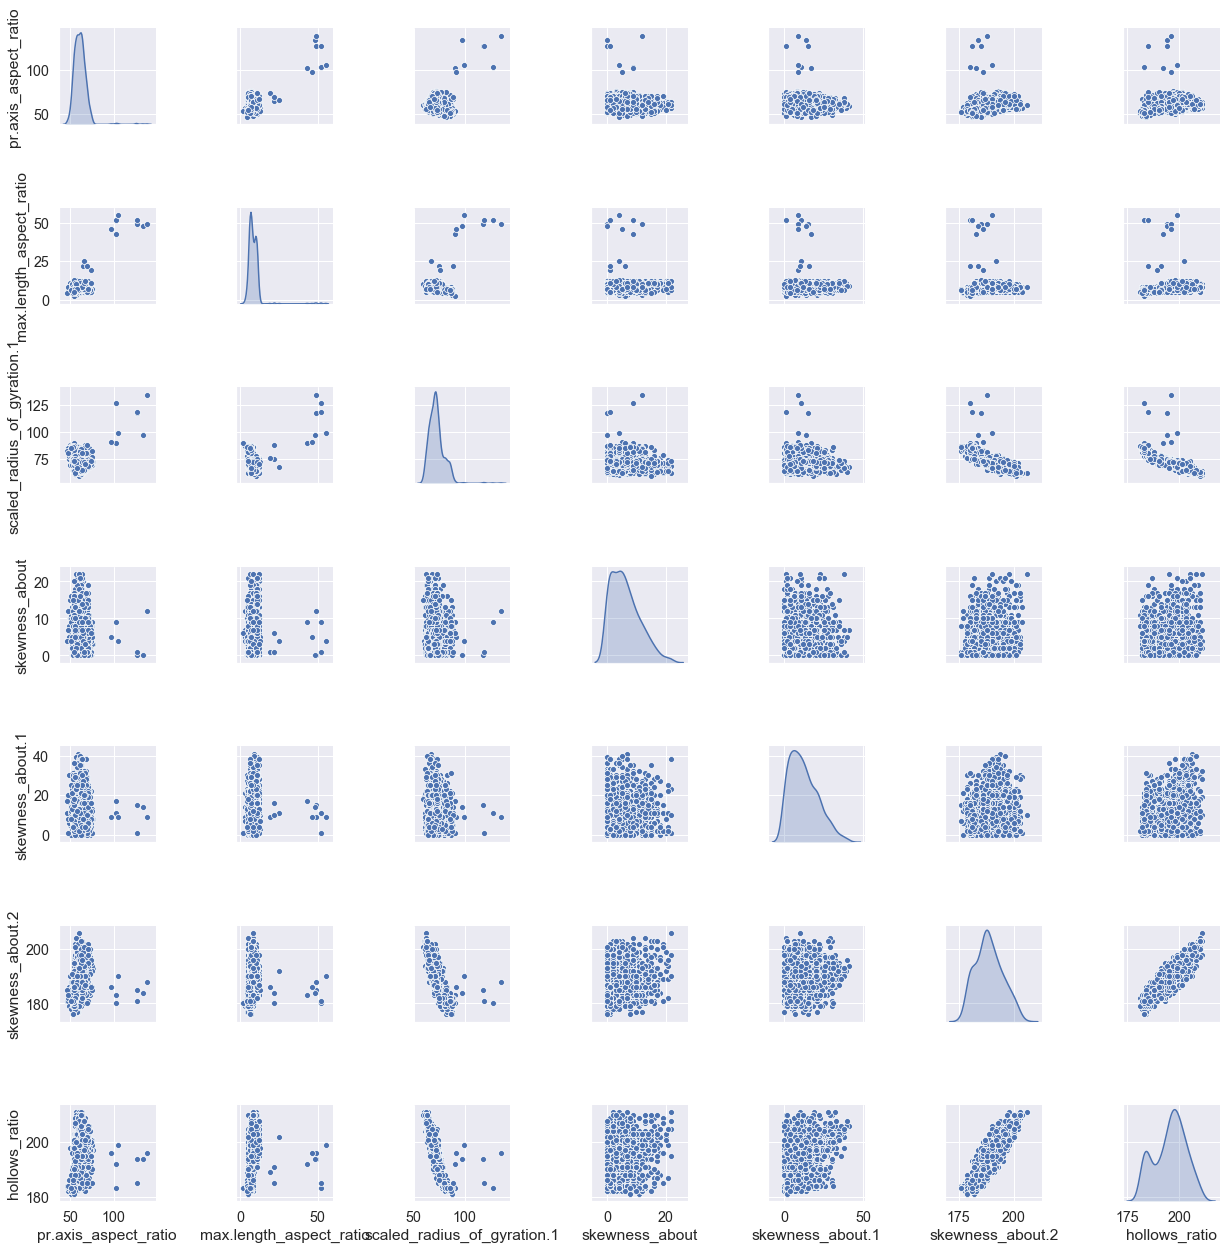

In [25]:
## pair plot for the set of columns that have a lower corelation amongst each other as per the heat map
sns.pairplot(data = df2,palette="husl", diag_kind="kde");

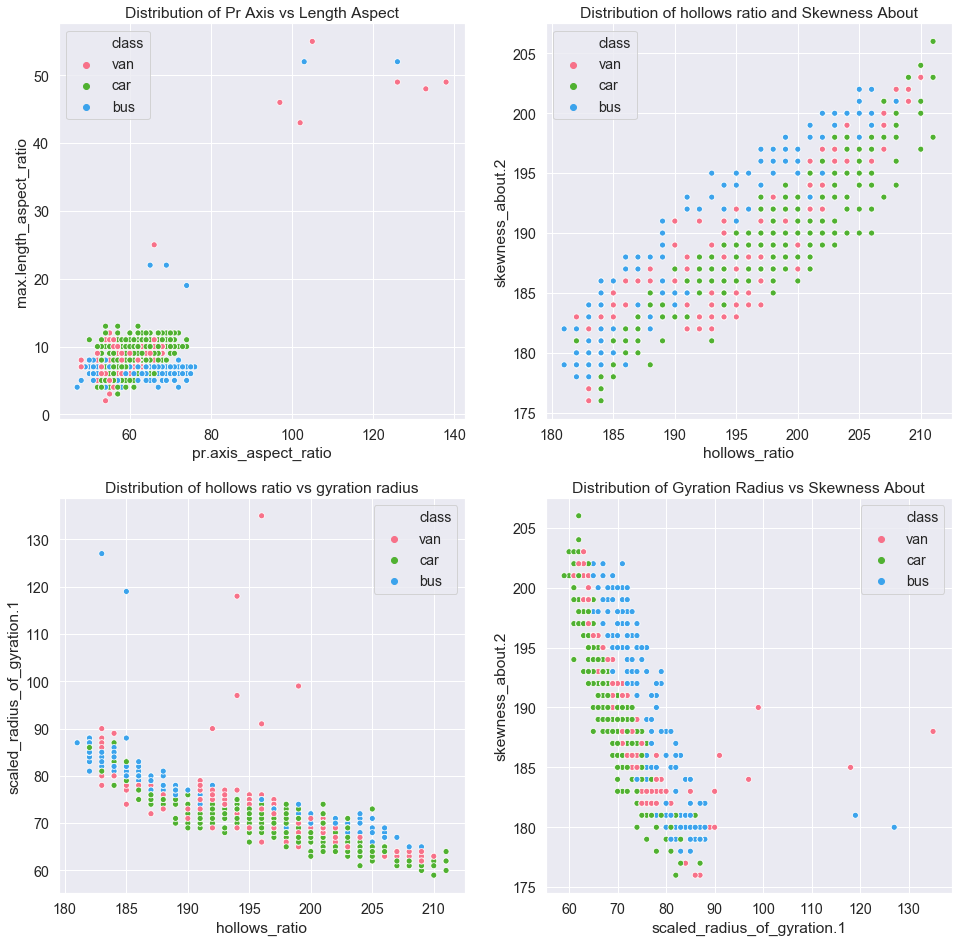

In [26]:
## plot the 4 columns as discussed in above section to view the corelation amongst themselves
df2 = df[['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
       'scaled_radius_of_gyration.1', 'skewness_about.2', 'hollows_ratio', 'class']]
f,ax=plt.subplots(2,2,figsize=(16,16))
ax[0][0].set_title('Distribution of Pr Axis vs Length Aspect')
sns.scatterplot(x = 'pr.axis_aspect_ratio', y = 'max.length_aspect_ratio', data = df2,
                hue="class", palette="husl", ax =ax[0][0])

ax[0][1].set_title('Distribution of hollows ratio and Skewness About')
sns.scatterplot(x = 'hollows_ratio', y = 'skewness_about.2', data = df2,
                hue="class", palette="husl", ax =ax[0][1])

ax[1][0].set_title('Distribution of hollows ratio vs gyration radius')
sns.scatterplot(x = 'hollows_ratio', y = 'scaled_radius_of_gyration.1', data = df2,
                hue="class", palette="husl", ax =ax[1][0])

ax[1][1].set_title('Distribution of Gyration Radius vs Skewness About')
sns.scatterplot(x = 'scaled_radius_of_gyration.1', y = 'skewness_about.2', data = df2,
                hue="class", palette="husl", ax =ax[1][1])
plt.show();
#sns.scatterplot(x = 'pr.axis_aspect_ratio', y = 'max.length_aspect_ratio', data = df2,hue="class", palette="husl"

# Observations from pair plot

Heat map indicated +Ve corelation between pr.axis_aspect_ratio and max.length_aspect_ratio. However on plotting the values we could see that there is not much of corelation if we ignore the outliers. (As per our earlier analysis through box plots we could see that max.length_aspect.ratio had highest number of outliers).

Hence we will include both the columns in our model. Also since they are not corelated we will not apply PCA on these columns.

Similarly 'skewness_about', 'skewness_about.1' columns donot have corelation with any other column and hence we will not apply 
PCA on those columns as well but include them as features in our model.

Hollows_ratio has got high corelation column skewness_about.2 and scaled_radius_of_gyration.1.So we will be use only Hollow_ratio column and drop skewness_about.2 and scaled_radius_of_gyration.1 assuming that the information contained in hollow_ratio column will also cover information contained in skewness_about.2 and scaled_radius_of_gyration.1 column.

However Hollow Ratio is not corelated to any other columns and hence we will not apply PCA on it but consider it as a feature in our model.

Heat map results are validated from the pair plot diagrams.

# Summary

There are a set of features which are corelated to each other and hence will be used for PCA.

Out of the remaining columns, we choose only few columns as representational for the remaining.

We will apply PCA on the first set and merge with the remaining columns to create the data for model training and testing.

# Actions based on the Data Exploration

Null Values - Replace Null values with median for the corresponding columns

Outliers - Remove the outliers from the data set based on earlier observations.

OUtcome variable is categorical(dtype as object) and needs to be replaced by 0(bus),1(car) and 2(van) for the three categories and changed to int64 datatype.



# Feature Selection

Create 2 different sets of columns.

List High - List of columns which show very high corelation amongst each other.

List Low - List of Columns which show low corelation amongst each other.

Since the data is on different scales in the columns, we will have to scale the data before applying PCA.

List High - Apply PCA to identify the features containing the majority of the information.

List Low - Donot apply PCA. Replace multiple columns which are highly corelated to each other only by a single representational column as per the analysis.

Merge both the dataset and create the final model.

drop skewness_about.2 and scaled_radius_of_gyration.1 column

SPlit the data into training and testing and then train the model.

Finally test the model with the test data and generate reports.

In [28]:
## DATA Preprocessing

## Copy data into a new data frame which will be used
work_df = df.copy()
work_df.shape
## create a new column with index as rownumbers to be used for merging
work_df.head()

(846, 19)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [29]:
## convert class column from category to numerical values
work_df["class"] = work_df["class"].astype("category")
work_df["class"] = work_df["class"].cat.codes
work_df["class"] = work_df["class"].astype("int64")
## replace null values with median
for cols in work_df.columns:
    ## class column is categorical
    if(cols != "class"): 
        work_df[cols] = work_df[cols].fillna(work_df[cols].median())

In [30]:
## remove the outliers
## the limits are selected based on the visual boxplot whiskers for these columns.
work_df = work_df[work_df["radius_ratio"] < 250]
work_df = work_df[work_df["pr.axis_aspect_ratio"] < 80]
work_df = work_df[work_df["max.length_aspect_ratio"] < 18]
work_df = work_df[work_df["scaled_radius_of_gyration.1"] <87]
work_df = work_df[work_df["scaled_variance.1"] < 950]

## rest the index post cleaning the outliers
work_df = work_df.reset_index(drop=True)

In [31]:
# Store features high corelation and low corelation column names
high_cor_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']

## drop the columns skewness_about.2 and scaled_radius_of_gyration.1
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1','hollows_ratio']
        #'scaled_radius_of_gyration.1', 
        #'skewness_about.2', 
        
## drop the columns skewness_about.2 and scaled_radius_of_gyration.1

x_columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
y_columns = ['class']

In [32]:
## Create the Feature and Prediction Dataframe
X = work_df[x_columns]
Y = work_df[y_columns]

In [33]:
## Scale the data using Standard Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
## Apply PCA on high Corelation columns
from sklearn.decomposition import PCA
## Copy the high corelation columns
X = X_std[high_cor_cols]

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 11
Reduced number of features: 6


In [35]:
## creata a data Frrame from PCA
principalDataframe = pd.DataFrame(data = X_pca)

Percentage Variance [84.34  7.37  2.85  2.24  1.44  0.88]


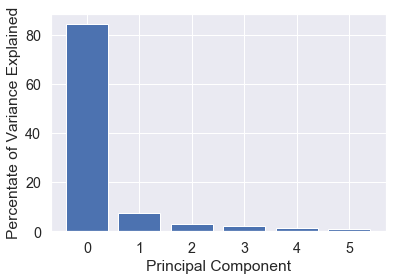

In [36]:
## PCA visualization how information is captured across components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = principalDataframe.columns
plt.bar(x= range(1,7), height=percent_variance, tick_label=columns)
#plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
print("Percentage Variance", percent_variance)
plt.show();

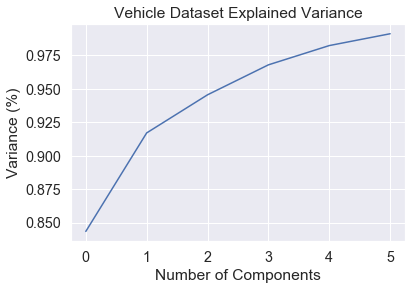

In [37]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show();

# Findings After applying PCA

We can see that the first Component explains more than 80% of variation.

BEtween first three components, more than 95% of the information is captured.

We will try to plot the values the three components for visualisation of the information distribution.

In [38]:
## combine the data frames for final feature selection
other_features = X_std[low_cor_cols]#stores the columns that donot have corelation

## we use the data frame for data distribution visualization after PCA application and reduction of features
X_pca_visual = pd.merge(principalDataframe,Y,right_index=True, left_index=True)


#merge with the data frame from pca (first three components)
principalDataframe1 = principalDataframe.iloc[:,0:3]
#principalDataframe1.head()
X = pd.merge(principalDataframe1,other_features,right_index=True, left_index=True)
#X.head()

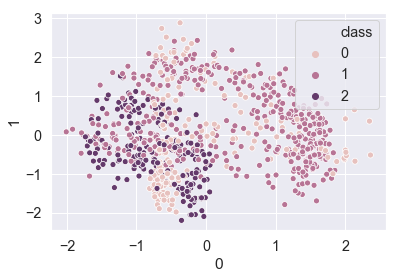

In [39]:
## Scatter visualization of data across 1st two components which provides more than 90% of information
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(X_pca_visual.loc[:,0],X_pca_visual.loc[:,1], hue = X_pca_visual["class"], palette=cmap )

## 0 is bus
## 1 is car
## 2 is van

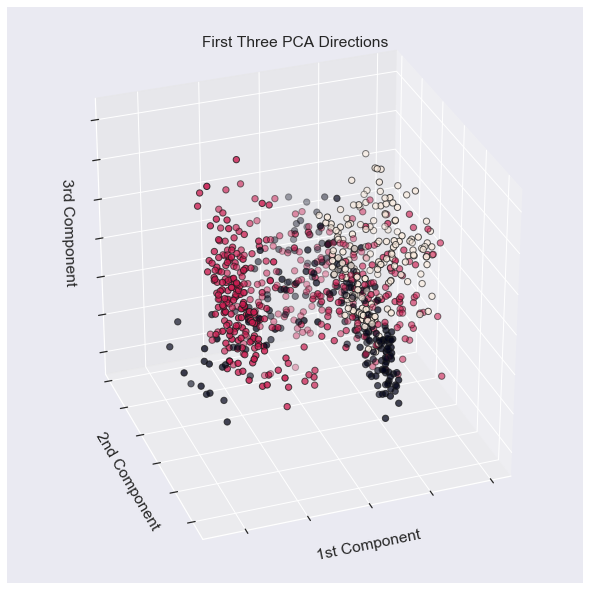

In [40]:
## 3D visualization for the distribution of data across the 1st three components
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()

fig = plt.figure(1,figsize = (8,8))
ax = Axes3D(fig,elev = -150,azim=110)
scatter = ax.scatter (X_pca_visual.loc[:,0],X_pca_visual.loc[:,1],X_pca_visual.loc[:,2],
            c=X_pca_visual["class"], edgecolor = 'k', s=40)
ax.set_title("First Three PCA Directions")
ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.set_zlabel("3rd Component")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

#colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
#custom_lines = [plt.Line2D([],[], ls="", marker='.', 
#               mec='k', mfc=c, mew=.1, ms=20) for c in colors]
#ax.legend(custom_lines, [lt[0] for lt in labelTups], 
#          loc='center left', bbox_to_anchor=(1.0, .5))

#plt.legend(X_pca_visual["class"].unique(), ['bus', 'car','van']);
#plt.legend(framealpha=1, frameon=True)
plt.show();

# Model1 - Train an SVM model (without tuning) along with features (selected using PCA and visual analysis)

In [41]:
## Now we Split the data set into train and test
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [42]:
## Split the train and test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Train Data 0.8621908127208481
Score on Test Data 0.8436213991769548
Confusion Matrix:
 [[ 44  11   5]
 [ 10 104   4]
 [  1   7  57]]
              precision    recall  f1-score   support

         bus       0.73      0.80      0.77        55
         car       0.88      0.85      0.87       122
         Van       0.88      0.86      0.87        66

   micro avg       0.84      0.84      0.84       243
   macro avg       0.83      0.84      0.83       243
weighted avg       0.85      0.84      0.84       243



# Model1 - Summary Findings After applying SVM

The accuracy score is 84% for test data when we used the 1st three components features obtained from PCA along with other features within the data set.

Confusion matrix indicates that out of 55 bus, 44 were identified correctly, 11 incorrectly.

for 122 cars, 104 were identified correctly, 18 identified incorrectly

for 66 vans, 57 were idenitified correctly and 9 identified incorrectly.

# Model1 - Tuning SVM parameters using Grid Search

In [43]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   14.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['linear'], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best Parameters:
 {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Use The Best SVM Parameters

In [44]:
svc_model = SVC (C =50, kernel = "rbf", gamma=0.01)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Train Data 0.9575971731448764
Score on Test Data 0.9300411522633745
Confusion Matrix:
 [[ 52   4   1]
 [  3 112   3]
 [  0   6  62]]
              precision    recall  f1-score   support

         bus       0.91      0.95      0.93        55
         car       0.95      0.92      0.93       122
         Van       0.91      0.94      0.93        66

   micro avg       0.93      0.93      0.93       243
   macro avg       0.92      0.93      0.93       243
weighted avg       0.93      0.93      0.93       243



# Summary for Selected Features Used with PCA

The Test data prediction accuracy increases from 84% to 93% which is a considerable improvement when used tuned parameters.

Performance across all the categories (bus,car and van) increases considerably for both precision and recall.

# Model1 - Additional check - Use all parameters (PCA 6 components + 7 additional features present within the data)

We use all the Features received out of PCA along with additional features present within the data set and check if there is improvement in the model performance.

In [45]:
## select all the columns not part of PCA
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1',
                'scaled_radius_of_gyration.1','skewness_about.2','hollows_ratio']       
other_features = X_std[low_cor_cols]

## combine with all the 6 components received from PCA transformation.
X = pd.merge(principalDataframe,other_features,right_index=True, left_index=True)

## split, Train and test model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Training Data 0.9399293286219081
Score on Test Data 0.9094650205761317
Confusion Matrix:
 [[ 52   9   5]
 [  3 109   1]
 [  0   4  60]]
              precision    recall  f1-score   support

         bus       0.79      0.95      0.86        55
         car       0.96      0.89      0.93       122
         Van       0.94      0.91      0.92        66

   micro avg       0.91      0.91      0.91       243
   macro avg       0.90      0.92      0.90       243
weighted avg       0.92      0.91      0.91       243



Additional Observations (Please see below )

if we use all the principal components as features, the model score improves to 90%.

precision and recall values also improves considerably.

# Model1 -Additional Check - Tune SVM Parameters

In [46]:
# Parameter Grid
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   13.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['linear'], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best Parameters:
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Model 1 -Additional Check- Test with Tuned parameters

In [47]:
## build the SVM model on training data
svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Training Data 0.980565371024735
Score on Test Data 0.9711934156378601
Confusion Matrix:
 [[ 54   1   1]
 [  1 119   2]
 [  0   2  63]]
              precision    recall  f1-score   support

         bus       0.96      0.98      0.97        55
         car       0.98      0.98      0.98       122
         Van       0.97      0.95      0.96        66

   micro avg       0.97      0.97      0.97       243
   macro avg       0.97      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



# Model1- Additional Check-Summary

Model yields improved results - accuracy of 97% post tuning the parameters.

This is the best score yielded across all the different models that have been tested in this project.

The precision and recall values are all above or equal to 95% across car, bus and van classes.

# Model 2 - Apply SVM on the original data set (No Feature Selection)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.3, random_state = 10) 
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
#svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
#'C': 10, 'gamma': 0.01, 'kernel': 'rbf'
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data", svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print("---- Classification Report -----")
print(metrics.classification_report(y_test, prediction, target_names=target_names))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Training Data 0.9381625441696113
Score on Test Data 0.9218106995884774
Confusion Matrix:
 [[ 52   7   4]
 [  3 110   0]
 [  0   5  62]]
---- Classification Report -----
              precision    recall  f1-score   support

         bus       0.83      0.95      0.88        55
         car       0.97      0.90      0.94       122
         Van       0.93      0.94      0.93        66

   micro avg       0.92      0.92      0.92       243
   macro avg       0.91      0.93      0.92       243
weighted avg       0.93      0.92      0.92       243



# Model2 - Summary Findings After applying SVM

The accuracy score is 92% for test data if we use the entire data set. This is higher than Model 1.

Confusion matrix indicates that out of 55 bus, 52 were identified correctly, 3 incorrectly. (Considerable improvement from Model1)

for 122 cars, 110 were identified correctly, 12 identified incorrectly (Slight Improvement)

for 66 vans, 62 were idenitified correctly and 4 identified incorrectly. (Considerable Improvement)

Overall, the Model 2 performs better than Model 1 based on Test Data.

# Model 2 - Tuning- Select parameters for SVM using Grid Search

In [49]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   10.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}, {'kernel': ['linear'], 'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best Parameters:
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [50]:
# use Identified best parameters for Model Training and testing
svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
#'C': 10, 'gamma': 0.01, 'kernel': 'rbf'
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data", svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print("---- Classification Report -----")
print(metrics.classification_report(y_test, prediction, target_names=target_names))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Score on Training Data 0.9787985865724381
Score on Test Data 0.9670781893004116
Confusion Matrix:
 [[ 55   2   1]
 [  0 116   1]
 [  0   4  64]]
---- Classification Report -----
              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        55
         car       0.99      0.95      0.97       122
         Van       0.94      0.97      0.96        66

   micro avg       0.97      0.97      0.97       243
   macro avg       0.96      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



# Model 2 - Findings after tuning

The Accuracy increases further to 96%.
Performance for identifying bus shows no errors on test data, while car and van category predictions also improve further.